In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# Register converters for better handling of dates by Matplotlib
register_matplotlib_converters()

Generating line_plot.png...
Generating bar_plot.png...
Generating box_plot.png...
All plots generated successfully.


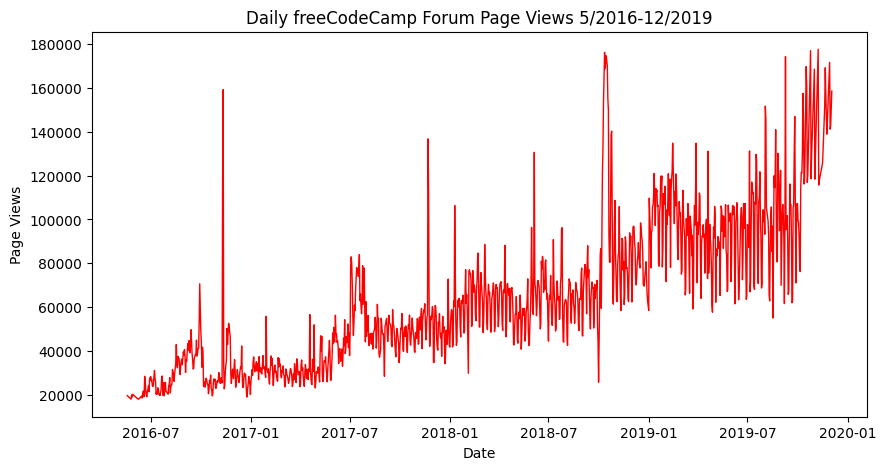

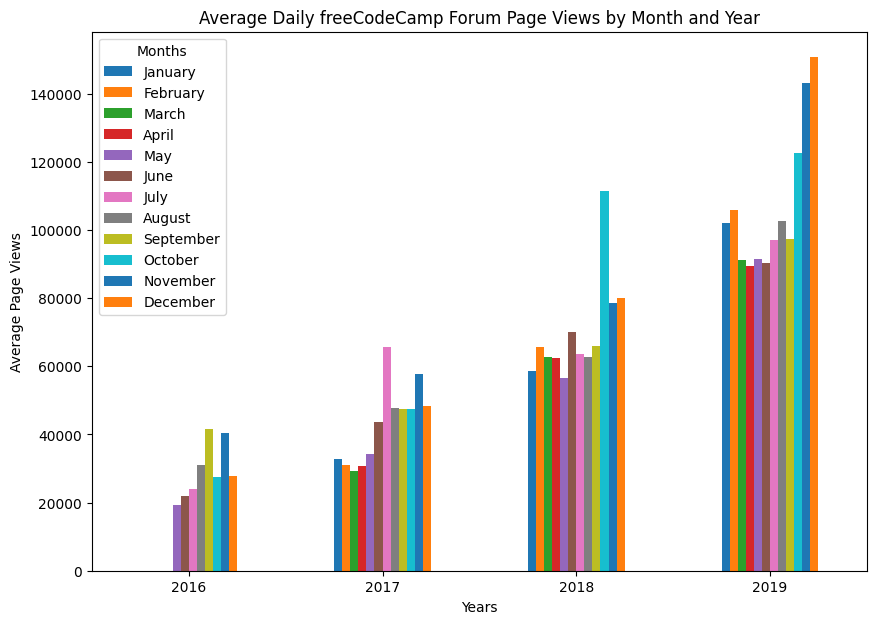

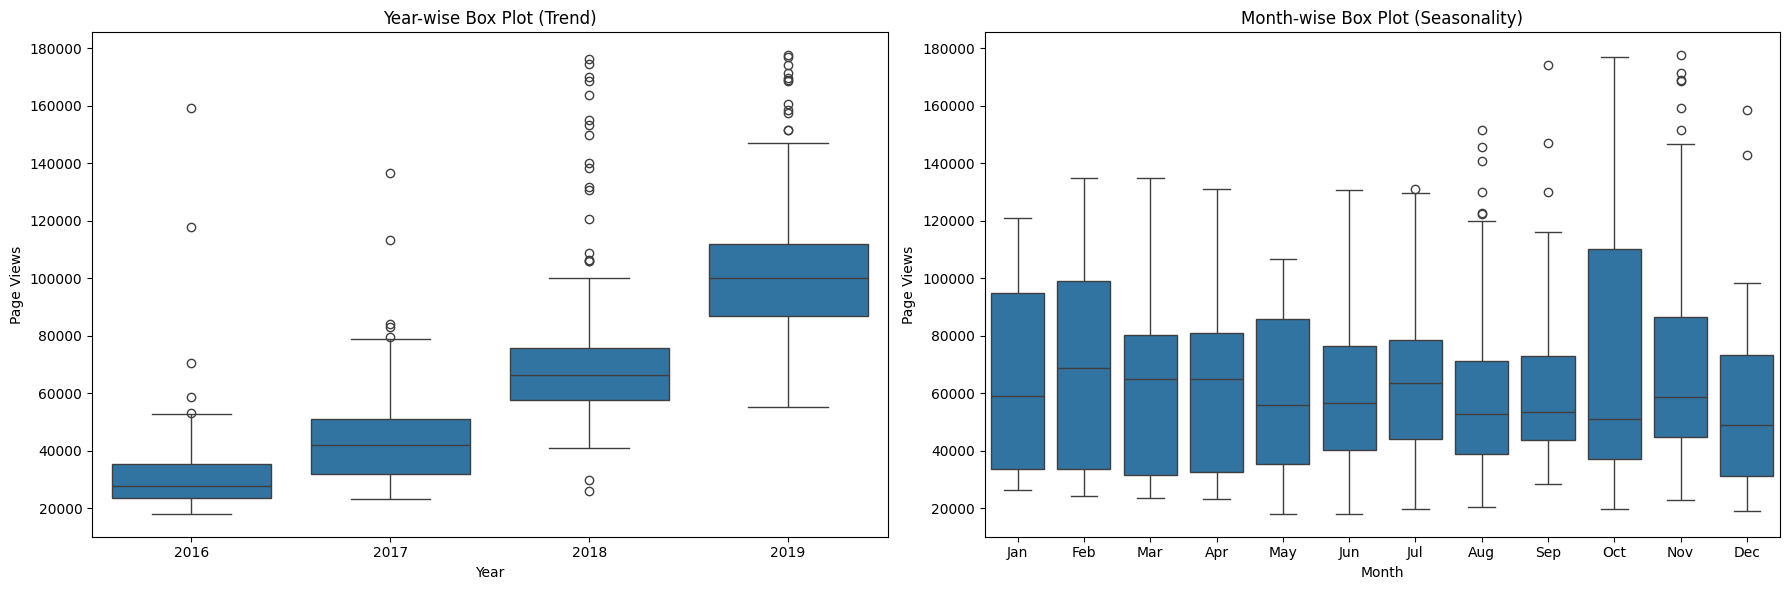

In [9]:
# --- 1. Data Import and Cleaning ---

def import_and_clean_data(file_path="C:\\Users\\anant\\Downloads\\fcc-forum-pageviews.csv"):
    """
    Imports the data, sets the index, and cleans it by filtering outliers.
    Returns the cleaned DataFrame.
    """
    try:
        # Import data
        df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")
    except FileNotFoundError:
        print(f"Error: '{file_path}' not found. Please ensure the file is in the current directory.")
        return pd.DataFrame() 
        
    # Clean the data by filtering out the top 2.5% and bottom 2.5% of page views
    lower_bound = df['value'].quantile(0.025)
    upper_bound = df['value'].quantile(0.975)
    
    # Filter the DataFrame
    df_clean = df[
        (df['value'] >= lower_bound) & 
        (df['value'] <= upper_bound)
    ]
    
    return df_clean

# Get the cleaned DataFrame globally for use by plotting functions
df = import_and_clean_data()

# --- 2. Line Plot Function ---

def draw_line_plot():
    """
    Creates a line chart showing daily page views.
    """
    # Use a copy of the cleaned data
    df_line = df.copy() 

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the data
    ax.plot(df_line.index, df_line['value'], color='red', linewidth=1)
    
    # Set title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save image and return fig (required for project)
    fig.savefig('line_plot.png')
    return fig

# --- 3. Bar Plot Function ---

def draw_bar_plot():
    """
    Creates a bar chart showing average daily page views for each month grouped by year.
    """
    # Prepare data for the bar plot
    df_bar = df.copy() 
    
    # Extract year and month
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    
    # Calculate the average daily page views for each month grouped by year
    df_group = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
    
    # Pivot the data for plotting
    df_pivot = df_group.pivot(index='year', columns='month', values='value')
    
    # Define month names
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
                   
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Plot the pivoted DataFrame as a bar chart
    df_pivot.plot(kind='bar', ax=ax)
    
    # Set labels and title
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('Average Daily freeCodeCamp Forum Page Views by Month and Year')
    
    # Set legend title and labels
    ax.legend(title='Months', labels=[month_names[i-1] for i in df_pivot.columns])
    
    # Set X-axis tick labels to be the years
    ax.set_xticklabels(df_pivot.index, rotation=0)

    # Save image and return fig (required for project)
    fig.savefig('bar_plot.png')
    return fig

# --- 4. Box Plot Function ---

def draw_box_plot():
    """
    Creates two adjacent box plots showing distribution of page views by year and month.
    """
    # Use a copy of the cleaned data
    df_box = df.copy()
    
    # Prepare data by adding 'year' and 'month' columns
    df_box['Year'] = df_box.index.year
    # Abbreviated month name (Jan, Feb, etc.)
    df_box['Month'] = df_box.index.strftime('%b') 
    
    # Define the order of months for correct plotting
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Create the figure and two subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Box Plot 1: Year-wise Box Plot (Trend)
    sns.boxplot(x='Year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    # Box Plot 2: Month-wise Box Plot (Seasonality)
    sns.boxplot(x='Month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Adjust layout
    plt.tight_layout()

    # Save image and return fig (required for project)
    fig.savefig('box_plot.png')
    return fig

# --- Optional: Call the functions to run the script and generate files ---
# If you run this file directly, these calls will execute the plotting logic.
if __name__ == '__main__':
    if not df.empty:
        print("Generating line_plot.png...")
        draw_line_plot()
        print("Generating bar_plot.png...")
        draw_bar_plot()
        print("Generating box_plot.png...")
        draw_box_plot()
        print("All plots generated successfully.")
    else:
        print("Could not generate plots due to data loading/cleaning error.")